In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pylab import rcParams


In [3]:
epl = pd.read_csv("http://www.football-data.co.uk/mmz4281/1920/E0.csv")
ep = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl.head()

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [5]:
epl = epl[:-10]
epl.mean()

/var/folders/nf/m6vxkd_s12jc7p45psfkvpxm0000gn/T/ipykernel_76084/841697889.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  epl.mean()


HomeGoals     1.516667
AwayGoals     1.194444
HTHG          0.688889
HTAG          0.544444
HS           13.455556
               ...    
PCAHA         1.973500
MaxCAHH       2.013722
MaxCAHA       2.028722
AvgCAHH       1.935778
AvgCAHA       1.951528
Length: 98, dtype: float64

In [7]:
goal_model_data = pd.concat(
    [
        epl[["HomeTeam", "AwayTeam", "HomeGoals"]]
        .assign(home=1)
        .rename(
            columns={"HomeTeam": "team", "AwayTeam": "opponent", "HomeGoals": "goals"}
        ),
        epl[["AwayTeam", "HomeTeam", "AwayGoals"]]
        .assign(home=0)
        .rename(
            columns={"AwayTeam": "team", "HomeTeam": "opponent", "AwayGoals": "goals"}
        ),
    ]
)

In [8]:
# Fit the model to the data
# Home advantage included
# Team and opponent as fixed effects.
poisson_model = smf.glm(
    formula="goals ~ home + team + opponent",
    data=goal_model_data,
    family=sm.families.Poisson(),
).fit()
poisson_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  720
Model:                            GLM   Df Residuals:                      680
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1000.2
Date:                Fri, 14 Jan 2022   Deviance:                       720.66
Time:                        15:01:48   Pearson chi2:                     617.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2060
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1826      0.209      0.874      0.382      -0.227       0.592
team[T.Aston Villa]             -0.2936      0.211     -1.391      0.164      -0.708       0.120
team[T.Bournemouth]             -0.3470      0.215     -1.616      0.106      -0.768       0.074
team[T.Brighton]                -0.3626      0.215     -1.689      0.091      -0.783       0.058
team[T.Burnley]                 -0.2816      0.210     -1.342      0.180      -0.693       0.130
team[T.Chelsea]                  0.1652      0.186      0.887      0.375      -0.200       0.530
team[T.Crystal Palace]          -0.5884      0.229     -2.571      0.010      -1.037      -0.140
team[T.Everton]                 -0.2378      0.207     -1.148      0.251      -0.644       0.168
team[T.Leicester]                0.2026      0.184      1.099      0.272      -0.159       0.564
team[T.Liverpool]                0.3470      0.179      1.939      0.053      -0.004       0.698
team[T.Man City]                 0.5551      0.173      3.217      0.001       0.217       0.893
team[T.Man United]               0.1504      0.187      0.805      0.421      -0.216       0.517
team[T.Newcastle]               -0.3726      0.215     -1.735      0.083      -0.793       0.048
team[T.Norwich]                 -0.7073      0.240     -2.948      0.003      -1.178      -0.237
team[T.Sheffield United]        -0.3516      0.213     -1.651      0.099      -0.769       0.066
team[T.Southampton]             -0.1433      0.202     -0.710      0.478      -0.539       0.253
team[T.Tottenham]                0.0519      0.191      0.271      0.786      -0.323       0.427
team[T.Watford]                 -0.4534      0.220     -2.062      0.039      -0.884      -0.023
team[T.West Ham]                -0.1121      0.201     -0.558      0.577      -0.506       0.281
team[T.Wolves]                  -0.1007      0.199     -0.507      0.612      -0.490       0.289
opponent[T.Aston Villa]          0.3823      0.193      1.976      0.048       0.003       0.762
opponent[T.Bournemouth]          0.3104      0.196      1.581      0.114      -0.074       0.695
opponent[T.Brighton]             0.1471      0.203      0.724      0.469      -0.251       0.545
opponent[T.Burnley]              0.0430      0.208      0.207      0.836      -0.365       0.450
opponent[T.Chelsea]              0.1267      0.207      0.612      0.540      -0.279       0.532
opponent[T.Crystal Palace]       0.0331      0.209      0.159      0.874      -0.376       0.443
opponent[T.Everton]              0.1514      0.203      0.745      0.456      -0.247       0.549
opponent[T.Leicester]           -0.1843      0.224     -0.822      0.411      -0.624       0.255
opponent[T.Liverpool]           -0.4009      0.239     -1.680      0.093    

In [53]:
home_team = "Man City"
away_team = "Arsenal"

# Predict for Arsenal vs Manchester City
home_score_rate = poisson_model.predict(
    pd.DataFrame(data={"team": home_team, "opponent": away_team, "home": 1}, index=[1])
)
away_score_rate = poisson_model.predict(
    pd.DataFrame(data={"team": away_team, "opponent": home_team, "home": 1}, index=[1])
)
print(home_team + " against " + away_team + " expect to score: " + str(home_score_rate))
print(away_team + " against " + home_team + " expect to score: " + str(away_score_rate))

Man City against Arsenal expect to score: 1    2.656922
dtype: float64
Arsenal against Man City expect to score: 1    1.232266
dtype: float64


In [69]:
# Lets just get a result
home_goals = np.random.poisson(home_score_rate)
away_goals = np.random.poisson(away_score_rate)
print(home_team + ": " + str(home_goals[0]))
print(away_team + ": " + str(away_goals[0]))

Man City: 2
Arsenal: 2


In [72]:
from football_modelling.simulation import simulate_match

max_goals = 5
score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)

array([[0.02660192, 0.02579988, 0.01251101, 0.0040446 , 0.00098066,
        0.00019022],
       [0.07067921, 0.06854826, 0.03324077, 0.01074619, 0.00260555,
        0.0005054 ],
       [0.09389457, 0.09106367, 0.04415906, 0.01427589, 0.00346137,
        0.0006714 ],
       [0.08315684, 0.08064968, 0.03910906, 0.01264331, 0.00306553,
        0.00059462],
       [0.0552353 , 0.05356997, 0.02597743, 0.00839807, 0.00203622,
        0.00039497],
       [0.02935117, 0.02846624, 0.013804  , 0.0044626 , 0.00108201,
        0.00020988]])

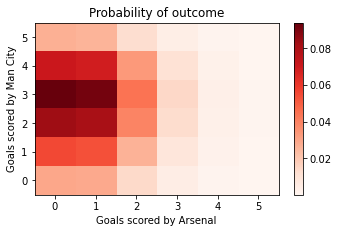

In [75]:
fig = plt.figure()

# Make 2d histogram of results
from pylab import rcParams

rcParams["figure.figsize"] = 12 / 2.54, 8 / 2.54
ax = fig.add_subplot(1, 1, 1)

pos = ax.imshow(
    score_matrix,
    extent=[-0.5, max_goals + 0.5, -0.5, max_goals + 0.5],
    aspect="auto",
    cmap=plt.cm.Reds,
)
fig.colorbar(pos, ax=ax)
ax.set_title("Probability of outcome")
plt.xlim((-0.5, 5.5))
plt.ylim((-0.5, 5.5))
plt.tight_layout()
ax.set_xlabel("Goals scored by " + away_team)
ax.set_ylabel("Goals scored by " + home_team)
plt.show()
fig.savefig("output/2DOutcomes.pdf", dpi=None, bbox_inches="tight")

In [81]:
# Home, draw, away probabilities
homewin = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
awaywin = np.sum(np.triu(score_matrix, 1))

print(f"Chance of {home_team} win: {np.round(100*homewin)}%")
print(f"Chance of draw: {np.round(100*draw)}%")
print(f"Chance of {away_team} win: {np.round(100*awaywin)}%")

Chance of Man City win: 68.0%
Chance of draw: 15.0%
Chance of Arsenal win: 11.0%
